<a href="https://colab.research.google.com/github/amrios80/parcial/blob/main/parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARCIAL 2 - CIENCIA DE DATOS - ADRIANA MARIA RIOS SOLANO

In [4]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install joblib

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import joblib

## 1. Evaluacion Cuantitativa

### Carga de datos

In [23]:
url="https://raw.githubusercontent.com/amrios80/parcial/refs/heads/main/diabetes_data_train.csv"
diabetes_data =pd.read_csv(url)

In [38]:
url="https://raw.githubusercontent.com/amrios80/parcial/refs/heads/main/diabetes_data_test.csv"
diabetes_data_test =pd.read_csv(url)

### Preprocesamiento del modelo

In [24]:
def dummy_encoding(col, dataframe):
    enc_df = pd.get_dummies(dataframe[col], columns=dataframe[col].unique(), drop_first=True, dtype=int, prefix=f"{col}_")
    dataframe = dataframe.join(enc_df)
    return dataframe, enc_df.columns


def diag_cluster(col, dataframe):
    diag_list = []
    for x in dataframe[col]:
        # Si la columna contiene 'V' o 'E' entonces se le asigna el valor 18
        if 'V' in x or 'E' in x:
            diag_list.append(18)
            continue
        # En todos los demás casos, se le asigna el valor indicado según el rango.
        elif 1 <= float(x) <= 139:
            diag_list.append(1)
        elif 140 <= float(x) <= 239:
            diag_list.append(2)
        elif 240 <= float(x) <= 279:
            diag_list.append(3)
        elif 280 <= float(x) <= 289:
            diag_list.append(4)
        elif 290 <= float(x) <= 319:
            diag_list.append(5)
        elif 320 <= float(x) <= 389:
            diag_list.append(6)
        elif 390 <= float(x) <= 459:
            diag_list.append(7)
        elif 460 <= float(x) <= 519:
            diag_list.append(8)
        elif 520 <= float(x) <= 579:
            diag_list.append(9)
        elif 580 <= float(x) <= 629:
            diag_list.append(10)
        elif 630 <= float(x) <= 679:
            diag_list.append(11)
        elif 680 <= float(x) <= 709:
            diag_list.append(12)
        elif 710 <= float(x) <= 739:
            diag_list.append(13)
        elif 740 <= float(x) <= 759:
            diag_list.append(14)
        elif 760 <= float(x) <= 779:
            diag_list.append(15)
        elif 780 <= float(x) <= 799:
            diag_list.append(16)
        elif 800 <= float(x) <= 999:
            diag_list.append(17)
    dataframe[col] = diag_list

In [25]:
diag_cluster('diag_1',diabetes_data)
diag_cluster('diag_2',diabetes_data)
diag_cluster('diag_3',diabetes_data)

diabetes_data, cols_race = dummy_encoding('race', diabetes_data)
diabetes_data, cols_diag_1 = dummy_encoding('diag_1', diabetes_data)
diabetes_data, cols_diag_2 = dummy_encoding('diag_2', diabetes_data)
diabetes_data, cols_diag_3 = dummy_encoding('diag_3', diabetes_data)

extra_cols = list(cols_race)+list(cols_diag_1)+list(cols_diag_2)+list(cols_diag_3)

In [26]:
diabetes_data.sample(3)

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,diag_3__8,diag_3__9,diag_3__10,diag_3__11,diag_3__12,diag_3__13,diag_3__14,diag_3__16,diag_3__17,diag_3__18
52304,87749,Caucasian,1,7,1,1,7,1,12,0,...,0,0,0,0,0,0,0,0,0,0
9418,75494,AfricanAmerican,0,8,2,6,7,6,30,3,...,0,0,0,0,0,0,0,0,0,0
32714,86735,Caucasian,1,9,1,3,7,3,47,0,...,0,0,0,0,0,0,0,0,0,0


### Conversion de variables categoricas a numericas mediante Label Encoder.

In [27]:
categorical_columns = diabetes_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != "readmitted":
        diabetes_data[col] = LabelEncoder().fit_transform(diabetes_data[col].astype(str))

In [28]:
diabetes_data.sample(3)

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,diag_3__8,diag_3__9,diag_3__10,diag_3__11,diag_3__12,diag_3__13,diag_3__14,diag_3__16,diag_3__17,diag_3__18
21116,51034,2,1,9,2,3,1,8,56,1,...,0,0,0,0,0,0,0,0,0,0
6607,64033,0,0,8,1,3,7,5,45,1,...,0,0,0,0,0,0,0,0,0,0
41802,2504,0,0,6,1,1,7,2,40,0,...,0,0,0,0,0,0,0,0,0,0


### Definicion de las variables de entrada (X) y la variable objetivo (Y) para los datos de entrenamiento.

In [32]:
X_train=diabetes_data[['num_lab_procedures', 'num_medications', 'age', 'gender', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed', 'change',
       'metformin', 'glipizide', 'number_outpatient', 'glyburide',
       'rosiglitazone', 'pioglitazone', 'number_inpatient', 'glimepiride',
       'number_emergency']+extra_cols]
y_train=diabetes_data['readmitted']

###Entrenamiento del modelo

In [33]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_split=2, min_samples_leaf=3, random_state = 2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=3, random_state=2)

### Preparacion datos de prueba

In [34]:
diabetes_data_test.sample(3)

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
3376,95807,Other,1,6,1,6,7,9,60,1,...,0,1,0,0,0,0,0,1,1,1
1779,101295,Caucasian,0,8,3,3,1,4,45,1,...,0,0,0,0,0,0,0,0,1,0
10927,52629,Caucasian,1,6,3,1,1,2,47,0,...,0,1,0,0,0,0,0,1,1,1


In [39]:
diag_cluster('diag_1',diabetes_data_test)
diag_cluster('diag_2',diabetes_data_test)
diag_cluster('diag_3',diabetes_data_test)

diabetes_data_test, cols_race = dummy_encoding('race', diabetes_data_test)
diabetes_data_test, cols_diag_1 = dummy_encoding('diag_1', diabetes_data_test)
diabetes_data_test, cols_diag_2 = dummy_encoding('diag_2', diabetes_data_test)
diabetes_data_test, cols_diag_3 = dummy_encoding('diag_3', diabetes_data_test)

extra_cols = list(cols_race)+list(cols_diag_1)+list(cols_diag_2)+list(cols_diag_3)

In [42]:
categorical_columns = diabetes_data_test.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != "readmitted":
        diabetes_data_test[col] = LabelEncoder().fit_transform(diabetes_data_test[col].astype(str))

In [43]:
X_test=diabetes_data_test[['num_lab_procedures', 'num_medications', 'age', 'gender', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed', 'change',
       'metformin', 'glipizide', 'number_outpatient', 'glyburide',
       'rosiglitazone', 'pioglitazone', 'number_inpatient', 'glimepiride',
       'number_emergency']+extra_cols]
y_test=diabetes_data_test['readmitted']

In [44]:
y_pred = clf.predict(X_test)

In [ ]:
df["readmitted"].value_counts()

NO     53818
>30    35173
<30    11250
Name: readmitted, dtype: int64

0    53818
1    46423
Name: readmitted, dtype: int64
Accuracy: 0.6381471752069963

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.73      0.69     16194
           1       0.63      0.53      0.57     13879

    accuracy                           0.64     30073
   macro avg       0.64      0.63      0.63     30073
weighted avg       0.64      0.64      0.63     30073



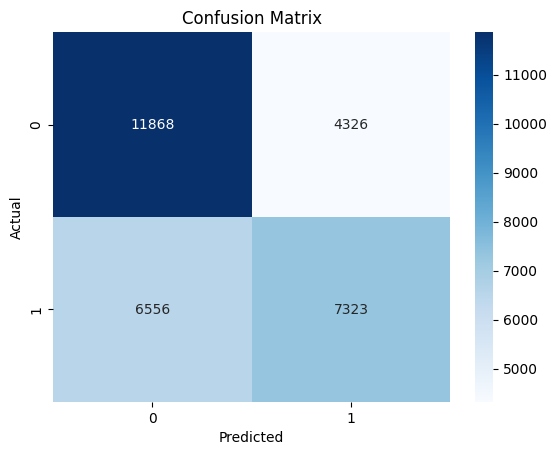

In [ ]:

# Check for missing values
#print(df.isnull().sum())

# Reemplaza "?" por NaN para facilitar el manejo
df.replace("?", np.nan, inplace=True)

# Drop columns with too many missing values or irrelevant features
df.drop(columns=['encounter_id', 'patient_nbr', 'Unnamed: 0'], inplace=True)

# Handle categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != "readmitted":
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Handle the target variable: readmitted
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x in ['NO'] else 1)

print(df["readmitted"].value_counts())

# Split the dataset
X = df.drop('readmitted', axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

Accuracy: 0.620878846825278

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.80      0.70     10845
           1       0.64      0.41      0.50      9204

    accuracy                           0.62     20049
   macro avg       0.63      0.60      0.60     20049
weighted avg       0.62      0.62      0.60     20049



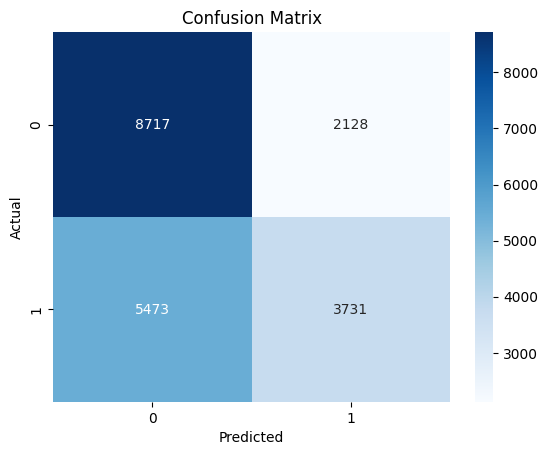

In [ ]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()